# 1st order uncoupled ODEs: Euler Scheme, Errors (Global and Local), Runge Kutta (2nd and 4th order)

## Termininology:

There are a few ways of characterising schemes. First is the __order__ of the scheme, which is written as $O(t^n)$ where n is the order of the scheme. The order of the scheme indicates the error of the numerical solution as compared to the true solution. It indicates the rate at which the error decreases as the step size between the independent variable is decreased.

This is done via Taylor Series, and estimates what the numerical approximation 'truncates'

The second is whether the scheme is __implicit__ or __explicit__. An __explicit scheme__ will take, in its first step in which it approximates the derivative, all the unknowns on one side of the equation and all knowns are on the other. An __implicit__ scheme is a scheme which is not __explicit__. Generally, __implicit__ schemes are more stable, but require more computational cost per step, as per step the computer will have to first re-arrange the equation such that all unknowns are on one side, which may require costly matrix inversion.

These are brief notes, but I do not want to linger on this point for too long. These terms will be best explained with concrete examples

## ODEs

We wish to construct a scheme to solve the following ODE, given initial conditions $x(t_0)=x_0$

$\frac{dx}{dt}=f(x,t)$

A fundamental limitation of computers is that a computer cannot solve a function at an infinite amount of points in a finite time. Thus the computer must solve the solution at a discrete grid of $n$ points $\{t_0,t_1,...,t_{n-1},t_{n}\}$.

A simple numerical scheme we will look at now is the __Explicit Euler Scheme__ which is __first order__ and __Explicit__. 

To see both of these, consider the taylor expansion for the true solution for this ODE, expanded as a taylor series. We will expand this series around some $t$:

$x(t+\delta t)=x(t)+\frac{dx}{dt}\Bigr|_{x(t),t} \delta t+\frac{1}{2!}\frac{d^2x}{dt^2}\Bigr|_{x(t),t} \delta t^2+...$

or

$x(t+\delta t)=x(t)+\frac{dx}{dt}\Bigr|_{x(t),t} \delta t+O(\delta t^2)$

where $O(\delta t^2)$ indicates terms of order higher or equal to $\delta t^2$

If one __truncates__ this expression, and leaves out all terms of order higher or equal to $\delta t^2$, then one gets the following;

$x(t+\delta t) \thickapprox x(t)+\frac{dx}{dt}\Bigr|_{x(t),t} \delta t$

Applying this to our grid of point and our ODE, we get as our Explicit Euler Scheme:

$x(t_{k+1}) = x(t_k) + f(x(t_k),t_k) * \delta t$

where $\delta t = t_{k+1}-t_{k}$

## Explicit/Implicit and Order Terminology applied

One subtracts the true solution from the numerical approximation to find the orders of the difference, and that is the local error. If the local error is $n$ then the global error is $n-1$, as the smaller the grid spacing, the more accurate it is to neglect the truncation. However, the smaller the grid spacing, the more truncations we have to make (as we have more grid points, and thus more points to approximate with our numerical scheme)

The Euler method is a 1st order scheme.

Furthermore, as one can see from above all $t_k$ is on the right and all $t_{k+1}$ is on the left. This means it is an explicit scheme.

Let us now construct a program to solve it and plot the results

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [30]:
def Exp_Euler_Graph(f,x0,t,tx):
    #Function to solve an ODE x'=f(x,t) for the initial condition x=x0 at t=t[0]. Plots function against real solution, provided by user
    #f = function of x and t that is equal to the derivative (Lambda Function)
    #x0 = x value at t=t[0] (float)
    #t = grid spacing of t (numpy array)
    #tx = x(t) true solution of x (Lambda Function)
    x=np.zeros(len(t)) #Create numpy array of x
    x[0]=x0 #set initial condition
    for k in range(1,len(t)): #Loop for data points
        x[k]=x[k-1]+f(x[k-1],t[k-1])*(t[k]-t[k-1]) #Apply Euler Scheme
    xt=tx(t)
    fig=plt.figure(figsize=(12,6))
    plt.plot(t,x,label='Numerical')
    plt.plot(t,xt,label='True Soln')
    plt.xlabel('t')
    plt.ylabel('x')
    plt.title('Explicit Euler Numerical Solution to ODE')
    plt.legend()

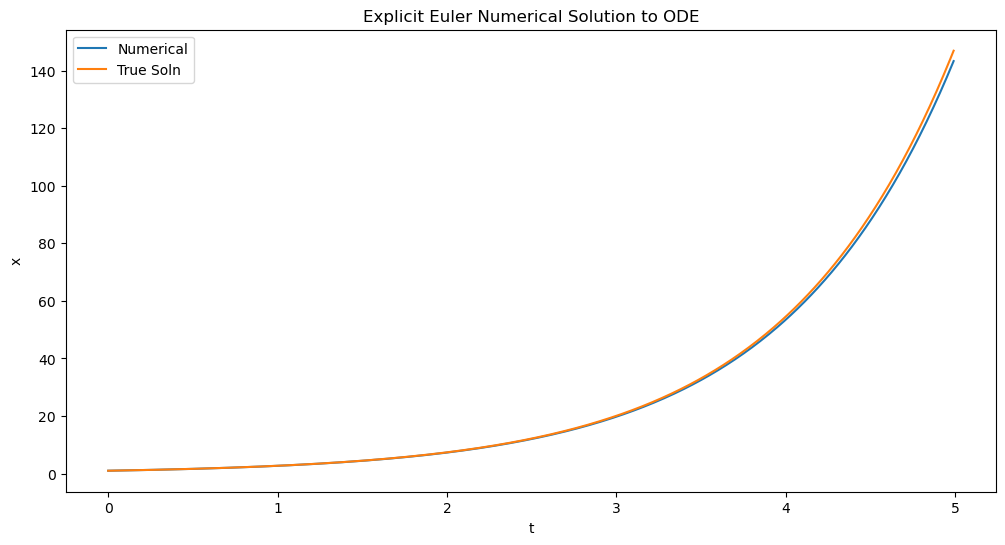

In [31]:
Exp_Euler_Graph(lambda x,t : x,1,np.arange(0,5,0.01),lambda t:np.exp(t))

## Runge Kutta Method

Essentially pick parameters for 

$x_{k+1}=x_{k}+\phi * \delta t$ 

where $\phi$ is _something_. Order of Explicit works the same.

2nd order Runge Kutta (also called the midpoint method) is:

$x_{k+1}=x_{k}+\delta t*f(t_k+\frac{\delta t}{2},x_k+\frac{\delta t}{2}f(t_k,x_k))$

4th order is:

$x_{k+1}=x_{k}+\frac{\delta t}{6}*(s_1+2s_2+2s_3+s_4)$

where:

\begin{align}
&s_1=f(t_k,x_k)\\
&s_2=f(t_k+\frac{\delta t}{2},x_k+\frac{\delta t}{2}s_1)\\
&s_3=f(t_k+\frac{\delta t}{2},x_k+\frac{\delta t}{2}s_2)\\
&s_4=f(t_k+\delta t,x_k+\frac{\delta t}{2}s_3)
\end{align}

In [33]:
#Code to return numerical approximations

def Expl_Euler(f,x0,t):
    #Function to solve an ODE x'=f(x,t) for the initial condition x=x0 at t=t[0] using the Explicit Forward Euler Method
    #f = function of x and t (x in first input, t in second input) that is equal to the derivative (Lambda Function)
    #x0 = x value at t=t[0] (float)
    #t = grid spacing of t. This function assumes that t has a constant difference between each adjacent element (i.e. deltat is constant) (1D numpy array)
    #x = returns numpy array of the same dimension of t as numerically solved by the explicit Euler Method(1D numpy array)
    dt=t[1]-t[0] #Create grid step
    x=np.zeros(len(t)) #Create numpy array of x
    x[0]=x0 #set initial condition
    for k in range(1,len(t)): #Loop for each t point
        x[k]=x[k-1]+f(x[k-1],t[k-1])*dt #Apply Euler Scheme
    
    return x


def RK2(f,x0,t):
    #Function to solve an ODE x'=f(x,t) for the initial condition x=x0 at t=t[0] using the 2nd order Runge Kutta Method
    #f = function of x and t (x in first input, t in second input) that is equal to the derivative (Lambda Function)
    #x0 = x value at t=t[0] (float)
    #t = grid spacing of t (1D numpy array)
    #x = returns numpy array of the same dimension of t as numerically solved by the explicit Euler Method(1D numpy array)
    dt=t[1]-t[0] #Create grid step
    x=np.zeros(len(t)) #Create numpy array of x
    x[0]=x0 #set initial condition
    for k in range(1,len(t)): #Loop for each t point
        x[k]=x[k-1]+f(x[k-1]+dt/2*f(x[k-1],t[k-1]),t[k-1]+dt/2)*dt #Apply 2nd order Runge Kutta
    
    return x

def RK4(f,x0,t):
    #Function to solve an ODE x'=f(x,t) for the initial condition x=x0 at t=t[0] using the 2nd order Runge Kutta Method
    #f = function of x and t (x in first input, t in second input) that is equal to the derivative (Lambda Function)
    #x0 = x value at t=t[0] (float)
    #t = grid spacing of t (1D numpy array)
    #x = returns numpy array of the same dimension of t as numerically solved by the explicit Euler Method(1D numpy array)
    dt=t[1]-t[0] #Create grid step
    x=np.zeros(len(t)) #Create numpy array of x
    x[0]=x0 #set initial condition
    for k in range(1,len(t)): #Loop for each t point
        s1=f(x[k-1],t[k-1])
        s2=f(x[k-1]+dt/2*s1,t[k-1]+dt/2)
        s3=f(x[k-1]+dt/2*s2,t[k-1]+dt/2)
        s4=f(x[k-1]+dt/2*s3,t[k-1]+dt/2)
            
        x[k]=x[k-1]+dt/6*(s1+2*s2+2*s3+s4) #Apply 4th order RK
    
    return x

In [35]:
thalf=np.arange(0,2,0.5)

tquarter=np.arange(0,2,0.25)

teigth=np.arange(0,2,0.125)

xEh=Expl_Euler(lambda x,t: t-x**2, 0, thalf)
xR2h=RK2(lambda x,t: t-x**2, 0, thalf)
xR4h=RK4(lambda x,t: t-x**2, 0, thalf)

xEq=Expl_Euler(lambda x,t: t-x**2, 0, tquarter)
xR2q=RK2(lambda x,t: t-x**2, 0, tquarter)
xR4q=RK4(lambda x,t: t-x**2, 0, tquarter)

xEe=Expl_Euler(lambda x,t: t-x**2, 0, teigth)
xR2e=RK2(lambda x,t: t-x**2, 0, teigth)
xR4e=RK4(lambda x,t: t-x**2, 0, teigth)

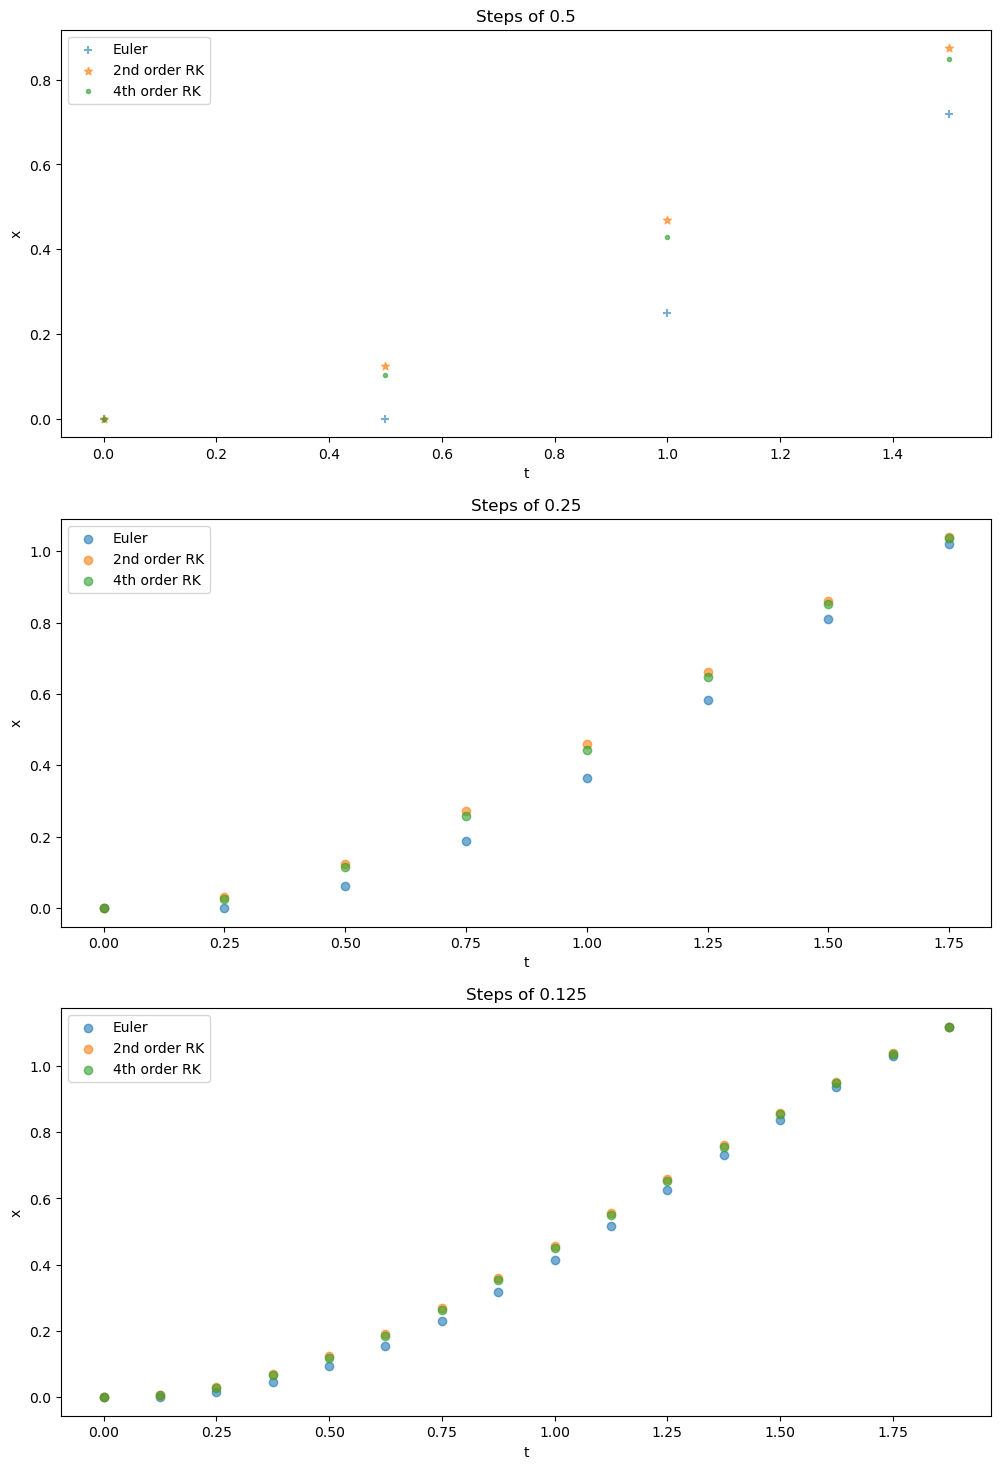

In [55]:
fig=plt.figure(figsize=(12,18))
ax1=fig.add_subplot(311)
plt.scatter(thalf,xEh,marker='+',label='Euler',alpha=0.6)
plt.scatter(thalf,xR2h,marker='*',label='2nd order RK',alpha=0.6)
plt.scatter(thalf,xR4h,marker='.',label='4th order RK',alpha=0.6)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Steps of 0.5')
plt.legend()

ax2=fig.add_subplot(312)
plt.scatter(tquarter,xEq,label='Euler',alpha=0.6)
plt.scatter(tquarter,xR2q,label='2nd order RK',alpha=0.6)
plt.scatter(tquarter,xR4q,label='4th order RK',alpha=0.6)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Steps of 0.25')
plt.legend()

ax3=fig.add_subplot(313)
plt.scatter(teigth,xEe,label='Euler',alpha=0.6)
plt.scatter(teigth,xR2e,label='2nd order RK',alpha=0.6)
plt.scatter(teigth,xR4e,label='4th order RK',alpha=0.6)
plt.xlabel('t')
plt.ylabel('x')
plt.title('Steps of 0.125')
plt.legend()